## California housing dataset

In this notebook we will work with the dataset known as “California housing dataset”. 

- - -
- - -

### 1) Importing libraries

In [88]:
import numpy as np
import os

import pandas as pd
from pandas.plotting import scatter_matrix

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

- - -
- - -

### 2) Getting the dataset

We use the dataset housing.csv (real estate, California, USA). 

The "target variable" is the `median house` value for California districts, expressed in hundreds of thousands of dollars.

This dataset was derived from the 1990 U.S. census, using one row per census block group. 

A **block group** is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

An `household` is a group of people residing within a home. 

Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.


##### *Info about the dataset*

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [2]:
housing_path ='datasets'
filename = "housing.csv"

# The function loads the data as a Pandas DataFrame instance.
def load_housing_data(housing_path, filename):
    csv_path = os.path.join(housing_path,filename )
    return pd.read_csv(csv_path)

housing = load_housing_data(housing_path, filename)

- - -
- - -
### 3)  EDA (Exploratory Data Analysis)

We are going to perform an exploratory analysis of the data in our dataset. 

The main objective is to obtain information about the data content, clean and complete our dataset. 

Then we will apply some ML algorithm to it.

In [3]:
#Overview: first five row (samples). Each row has ten feactures
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# We check if each feature is complete
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We see that there are **20640** entries or samples, with 10 columns each. Except for `ocean_proximity`, all columns are numbers (`float64`). 

Also, some entries are missing in the `total_bedrooms` column. Each rows corresponds to a California district. 

Let's take a closer look at `ocean_proximity`. What values does it take?

Let's take a closer look at `ocean_proximity`. What values does it take?



In [6]:
print(housing['ocean_proximity'].unique())
print(housing.ocean_proximity.unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


We can see how many times each value appears in ocean_proximity.

In [7]:
print(housing.ocean_proximity.value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [8]:
# normalized version
print(housing.ocean_proximity.value_counts(normalize=True))

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64


***

For numeric columns, we can obtain simple descriptive statistics using the `.describe` method.


In [11]:
housing.describe(percentiles=[0.1,0.25,0.5,0.75])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
10%,-122.290000,33.630000,13.000000,941.000000,198.000000,510.000000,184.000000,1.903800,82300.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Note 1**: This method automatically excludes empty or `NaN` entries from the calculation. Look at the `count` entry in the `total_bedrooms` column.
 
  **Note 2**: You can adjust which percentiles are calculated using the `percentiles` argument of the `describe` method.

***
We can order the table to see the districts in which some column takes extreme values.

In [9]:
housing.sort_values(by='housing_median_age', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18881,-122.25,38.10,52.0,248.0,86.0,173.0,69.0,2.3000,109400.0,NEAR BAY
1671,-122.21,38.06,52.0,2735.0,559.0,1076.0,487.0,3.6154,155700.0,NEAR BAY
19116,-122.65,38.23,52.0,1735.0,347.0,712.0,343.0,3.1711,200800.0,<1H OCEAN
19516,-121.01,37.64,52.0,201.0,35.0,74.0,22.0,1.3036,75000.0,INLAND
16200,-121.27,37.95,52.0,1318.0,308.0,1368.0,310.0,1.8261,54600.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
12077,-117.64,33.87,2.0,17470.0,2727.0,5964.0,1985.0,6.2308,257900.0,<1H OCEAN
18972,-122.00,38.23,1.0,2062.0,343.0,872.0,268.0,5.2636,191300.0,INLAND
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND
3130,-117.95,35.08,1.0,83.0,15.0,32.0,15.0,4.8750,141700.0,INLAND


***

 We can group entries based on the value of a given variable. This is useful for quick data analysis. For example, let's see how the mean values of the columns change with the variable `ocean_proximity`.

In [10]:
housing.groupby(by='ocean_proximity').mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


***

We can calculate statistics that involve more than one variable. 

The most common is the Pearson correlation coefficient. 

The Pearson coefficient of two variables $X$ and $Y$, which we call $\hat{\rho_{XY}}$, is an _estimator_ of the population correlation coefficient:

$$
\hat{\rho_{XY}} = r = \frac{\hat{\mathrm{cov}}_{XY}}{\hat{\sigma}_X \hat{\sigma}_Y}\;\;,
$$

where

$$
\hat{\sigma}_X^2 = \frac{1}{N - 1}\sum_{i=1}^N (x_i - \bar{X})^2\;\;,
$$
$$
\hat{\mathrm{cov}}_{XY} = \frac{1}{N - 1}\sum_{i=1}^N (x_i - \bar{X})(y_i - \bar{Y})\;\;,
$$

and

$$
\hat{\mu_X} = \bar{X}\;\;.
$$

The extreme values are -1 and 1, for a perfect linear (anti-)correlation between both variables. 

$r=0$ means that the variables are not linearly correlated, but they could be in a `nonlinear` way, and therefore we cannot say that they are independent variables.

To get a more intuitive idea, let's analyze this image, taken from [Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient):

<p style="text-align: center"> <img align='center' src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg">

The numbers on each subimage indicate the value of the Pearson coefficient. 

Let us now calculate the Pearson coefficient for each pair of variables in the California data set.

In [11]:
# The correlation between all pairs of variables is easily computed with Pandas.
corr_matrix = housing.corr()

# What size do you expect `corr_matrix` to be?
print(corr_matrix.shape)

(9, 9)


/tmp/ipykernel_6738/2526300670.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


We can print the matrix; but more interesting, we can graph it.

In [12]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


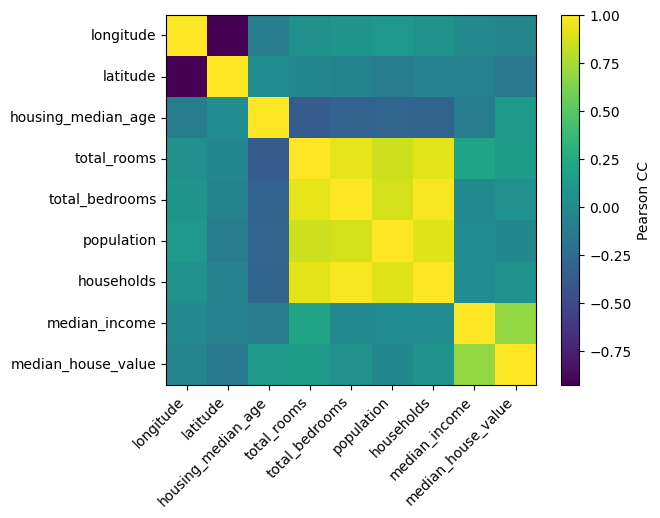

In [13]:
plt.imshow(corr_matrix)

# Set ticks
xt = plt.xticks(np.arange(9), housing.columns[:-1], rotation=45, ha='right', va='top')
yt = plt.yticks(np.arange(9), housing.columns[:-1], rotation=0, ha='right', va='center')
# horizontal alignment or ha argument 
# vertical alignment or va argument

# Set colorbar
plt.colorbar(label='Pearson CC')

---

### 3.1)  Visualization

A great way to get information from the data set is to make graphs!  Plotting can be done using `Pandas` but we will use the `pyplot` functions (imported above as `plt`).

Some functions that we can test are:

* `plt.plot` or `plt.scatter` to plot one variable against another.
* `plt.hist` or `plt.bar` to see how the values of a variable are distributed.
* `plt.boxplot` to compare the distributions of the variables.
* `plt.violinplot` to do the same thing using a *kernel* estimate (which is a considered machine learning algorithm).

We can see how the distribution of house prices changes with respect to each category of `ocean proximity`.

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


Text(0, 0.5, 'Median House Value')

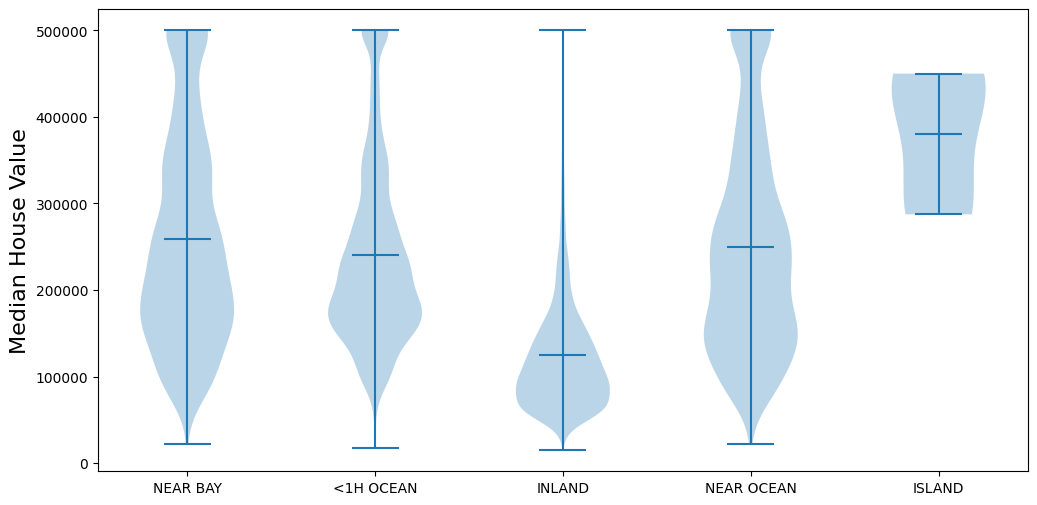

In [14]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

categories = housing.ocean_proximity.unique()
print(categories)

datos = [housing.loc[(housing.ocean_proximity == cat)].median_house_value for cat in categories]

ax.violinplot(dataset=datos, showextrema=True, showmeans=True, points=1000)
ax.xaxis.set_ticks(range(1, len(categories)+1))
ax.xaxis.set_ticklabels(categories)
ax.set_ylabel('Median House Value', fontsize=16)

In [15]:
#Util tool:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join('images', fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure bad_visualization_plot


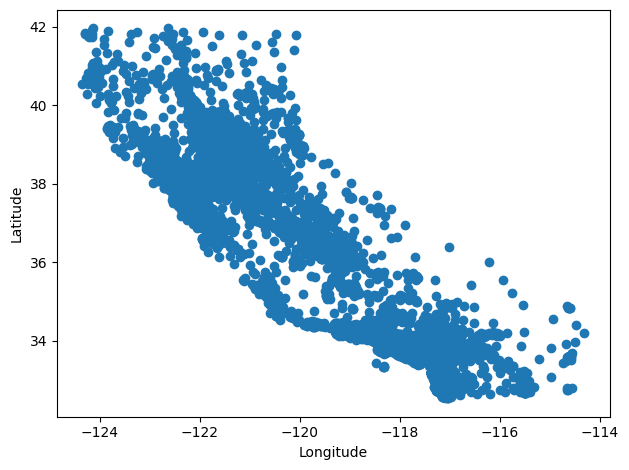

In [16]:
# Let's make  simple plot of latitude vs longitude
scatter = plt.scatter(housing.longitude, housing.latitude)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
save_fig("bad_visualization_plot")

This is a pretty ugly graph. It doesn't tell us much. We can make out the shape of California, but that is about it.

<img src="images/Map_of_California.png" width=700/>

#### __Adding information__

To start, let's make the same graph as above using transparency for the points.

(To control the size of the figure, we first create a `figure` instance)

Saving figure better_visualization_plot


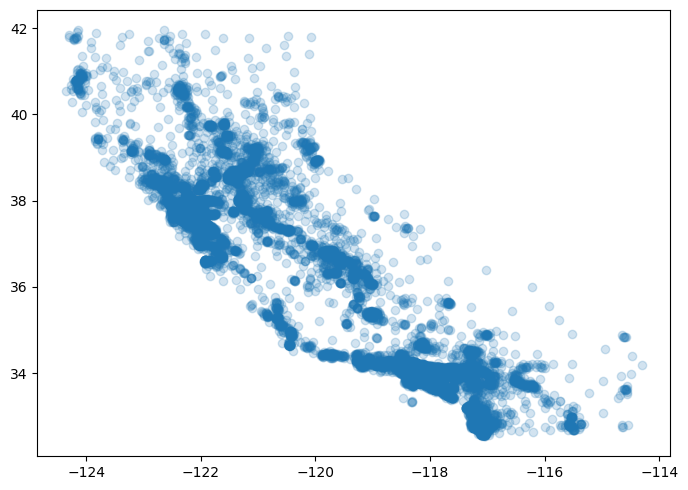

In [17]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
scat = ax.scatter(housing.longitude, housing.latitude, alpha=0.2)
save_fig("better_visualization_plot")

Now we can see some regions more densely populated than others.

**Question**: What other variables would you include in this plot?

* Color by category

Saving figure color_categ_visualization_plot


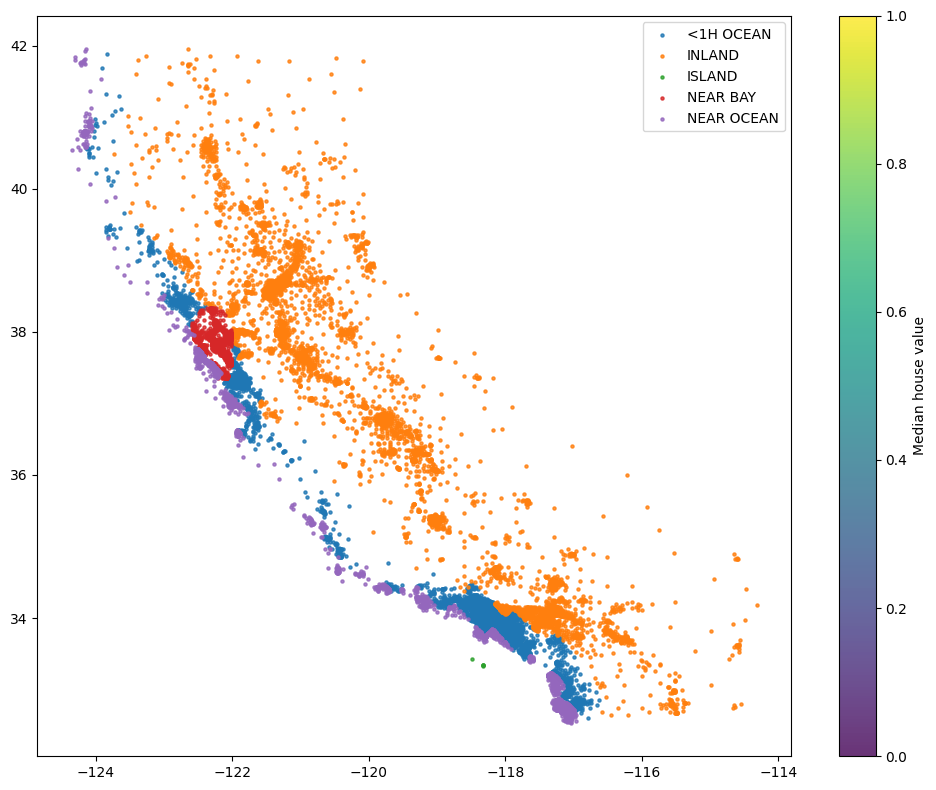

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

groups = housing.groupby('ocean_proximity')

for n, g in groups:  #n = district name, g: DataFrame filtered by district
    scat = ax.scatter(g.longitude, g.latitude, alpha=0.8, s=5, label=n)

plt.colorbar(scat, label='Median house value')
leg = ax.legend()
save_fig("color_categ_visualization_plot")

One option is to include `population` and `median_house_value`

Saving figure color_categ_popu_visualization_plot


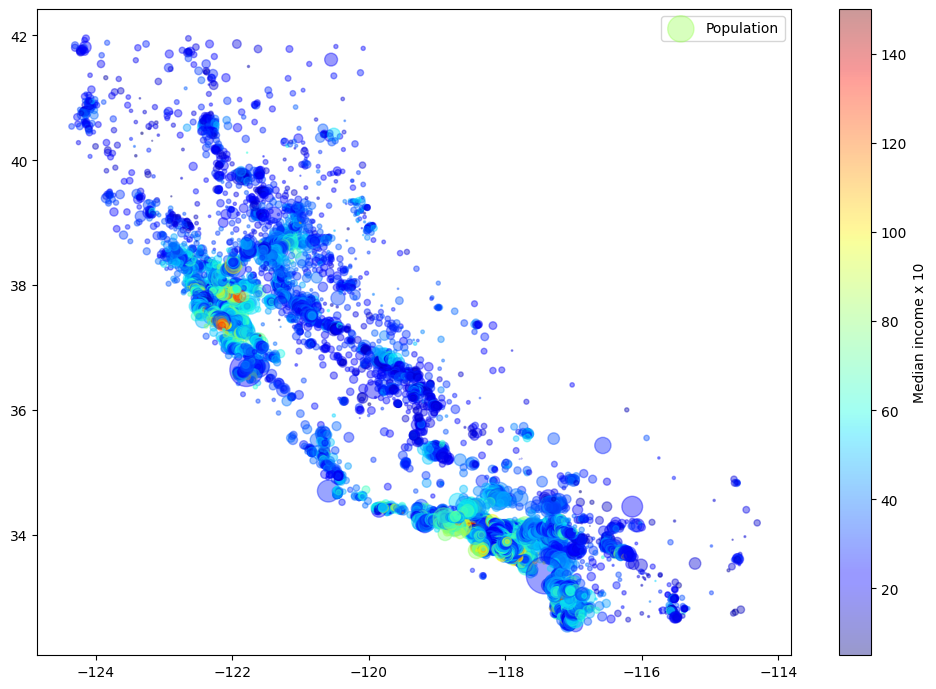

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
scat = ax.scatter(housing.longitude, housing.latitude, alpha=0.4, 
                  c=housing.median_income*10, cmap=plt.get_cmap('jet'),
                  s=housing.population/50, label='Population')
plt.colorbar(scat, label='Median income x 10')
leg = ax.legend()
save_fig("color_categ_popu_visualization_plot")

Saving figure color_categ_income_visualization_plot


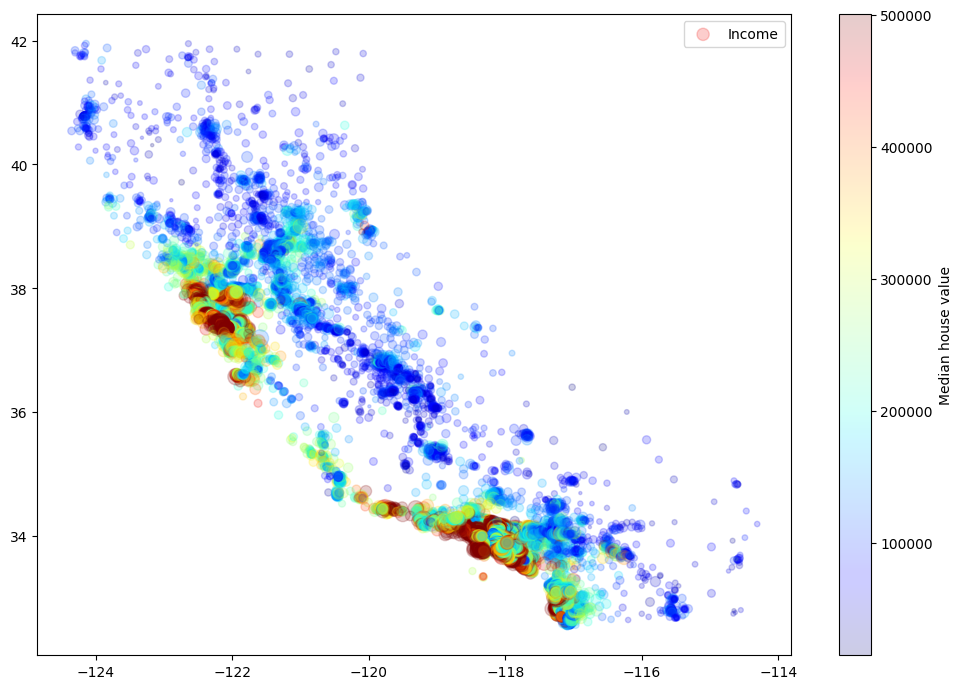

In [24]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
scat = ax.scatter(housing.longitude, housing.latitude, alpha=0.2, 
                  c=housing.median_house_value, cmap=plt.get_cmap('jet'),
                  s=housing.median_income*10, label='Income')
plt.colorbar(scat, label='Median house value')
leg = ax.legend()
save_fig("color_categ_income_visualization_plot")

**Note**. We use a factor of 10 and 50 for income and population, respectively, to correctly use the full range of sizes and colors.

We now include a map of California

Saving figure california_housing_prices_plot


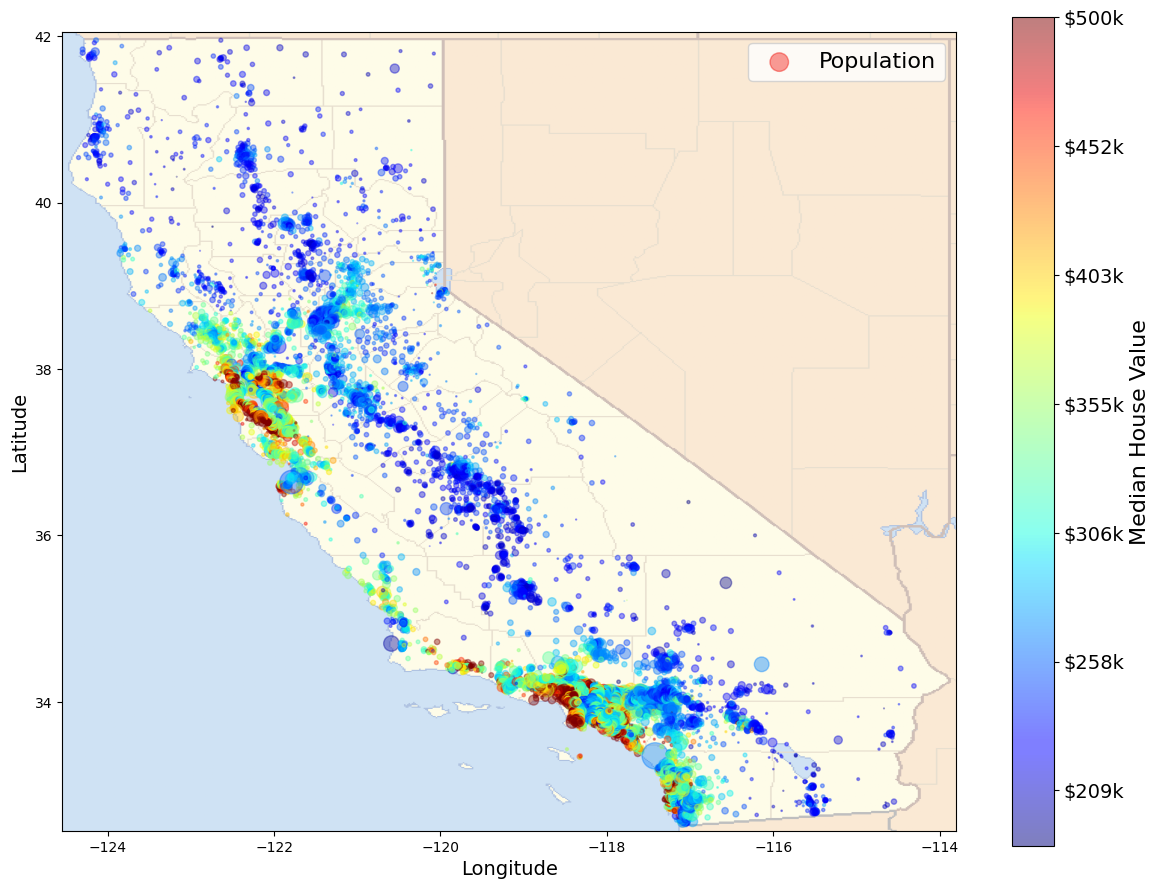

In [25]:
import matplotlib.image as mpimg

# Read California image
filename = "california.png"
california_img = mpimg.imread(os.path.join('images', filename))

fig = plt.figure(figsize=(12, 9))
plt.scatter(housing.longitude, housing.latitude, s=housing.population/100,
           c=housing.median_house_value, cmap=plt.get_cmap('jet'), label='Population', alpha=0.4)
ax = fig.axes[0]

# Show image below
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

# Labels
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Tweak colorbar
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

This final graph has a lot of information, which we can now also relate to our knowledge of the housing market (ie, the red areas correspond to regions around Los Angeles and the San Francisco Bay Area).

***

### _Conclution_

We start from a file with columns separated by commas, to a visualization full of information. 
For that, we explore how variables depend on each other, and also take a closer look at quirks of some columns (such as missing values).
This type of exploratory data analysis is a required first step in all machine learning projects and a powerful tool for maximizing what can be gained from data.

***
***

### We continue to use some visualization tools:

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

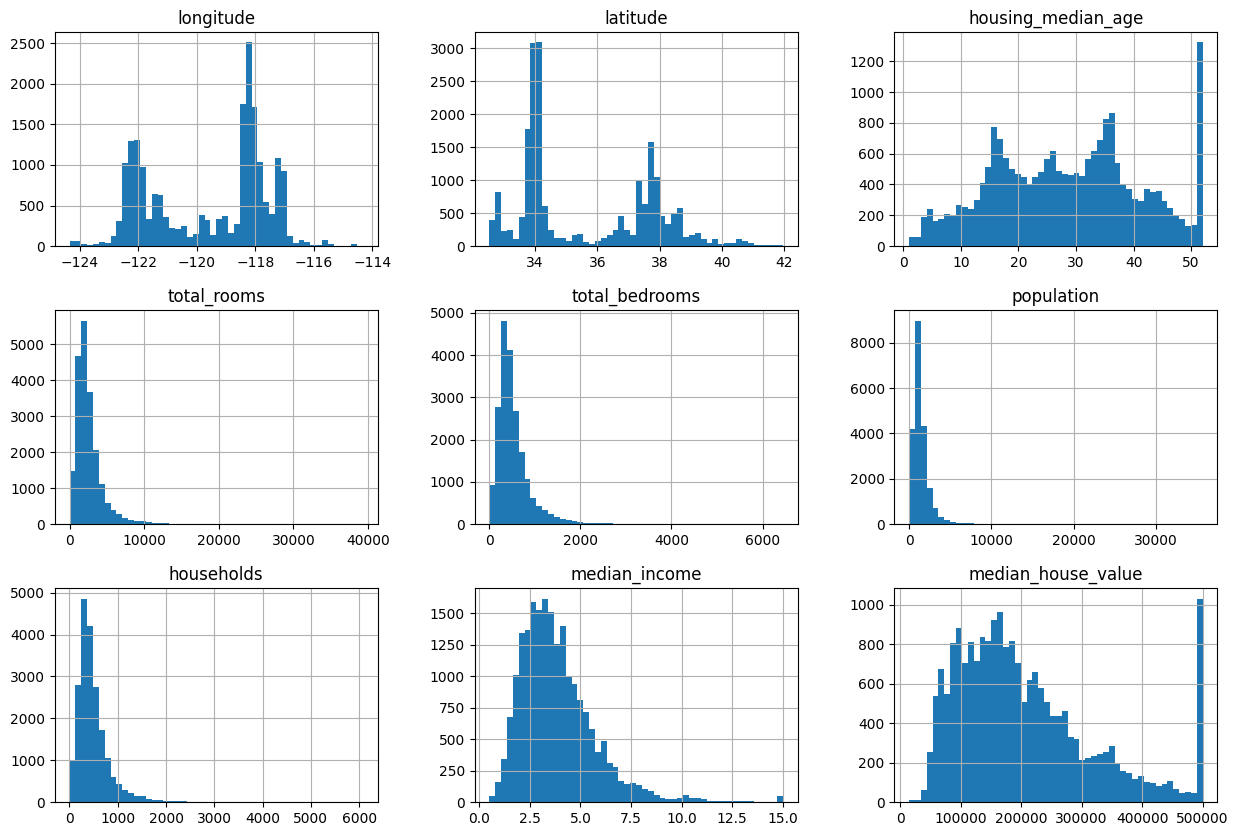

In [26]:
housing.hist(bins=50, figsize=(15,10))

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

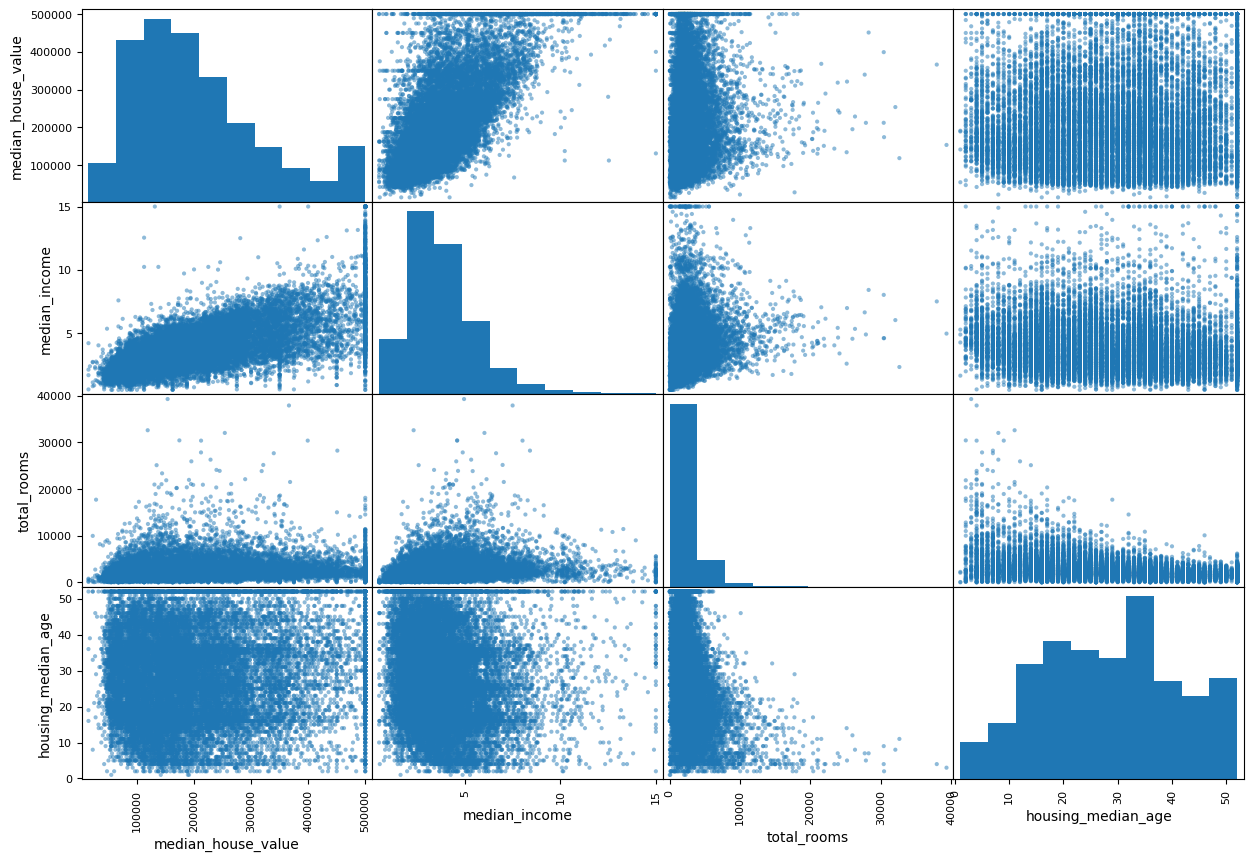

In [27]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15, 10))

In [66]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

/tmp/ipykernel_26765/826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

***
### Rare values

As seen in the graphs, there are features with rare values

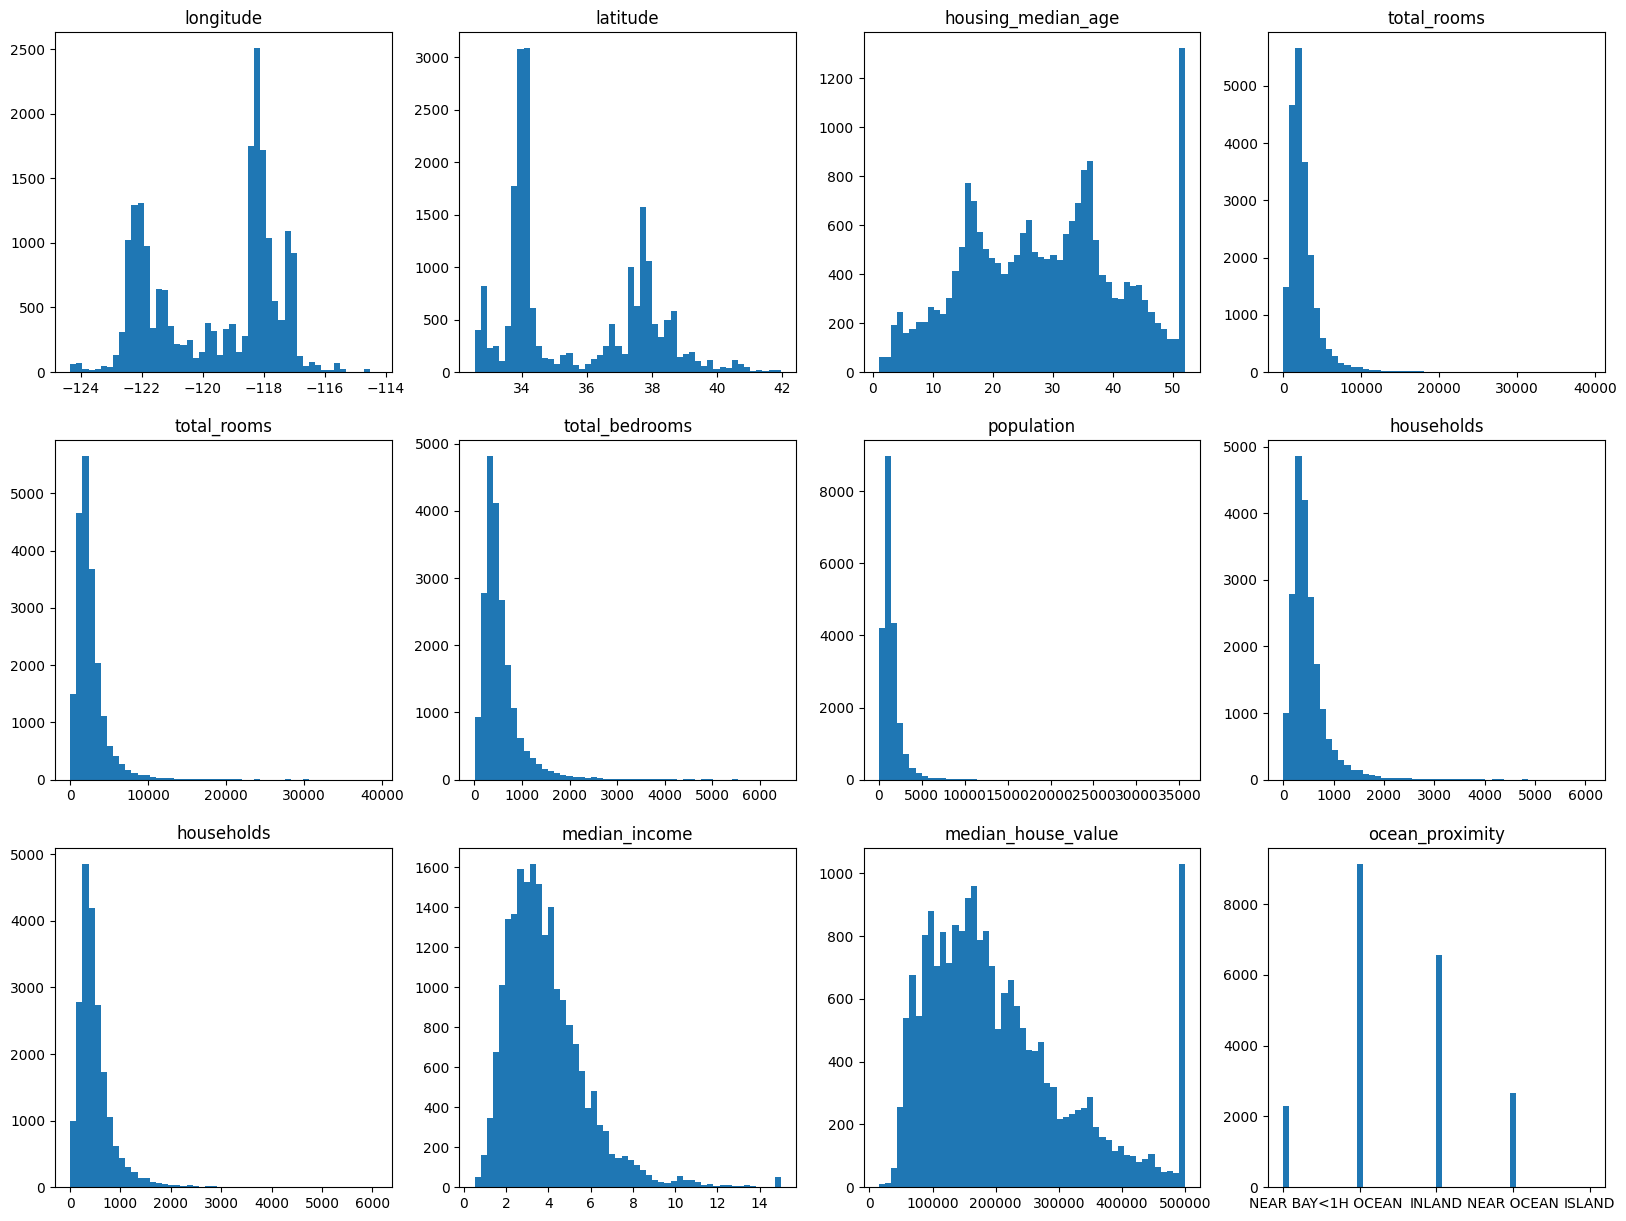

In [34]:
columns = housing.columns.to_list()
# print(type(columns))
# print(columns)

N_col = 4
N = len(columns)
N_rows = int(np.ceil(N/N_col))

fig, ax = plt.subplots(N_rows,N_col, figsize=(5*N_col,5*N_rows))

for i in range(N_rows):
    for j in range(N_col):
        ax[i,j].hist(housing[columns[i*N_rows+j]], bins=50)
        ax[i,j].set_title(columns[i*N_rows+j])

We see that there is a saturation in some features: `median_house_value`, `housing_median_age`, `median_income`

In [35]:
problematic_columns = ['median_house_value', 'housing_median_age', 'median_income']
max_values=[]

for col in problematic_columns:
    max_value = housing[col].max()
    print(f"{col}: {sum(housing[col] == max_value)} districts with {col} = {max_value} ({round(sum(housing[col] == max_value)/len(housing)*100,2)}%).")
    max_values.append(max_value) 

median_house_value: 965 districts with median_house_value = 500001.0 (4.68%).
housing_median_age: 1273 districts with housing_median_age = 52.0 (6.17%).
median_income: 49 districts with median_income = 15.0001 (0.24%).


When this happens, we have to say what we do. 

One option is to discard them and set a height from which we do not trust the model.

In [68]:
housing_clean = housing.copy()

for col, max_value in zip(problematic_columns, max_values):
    housing_clean = housing_clean[housing_clean[col] != max_value]

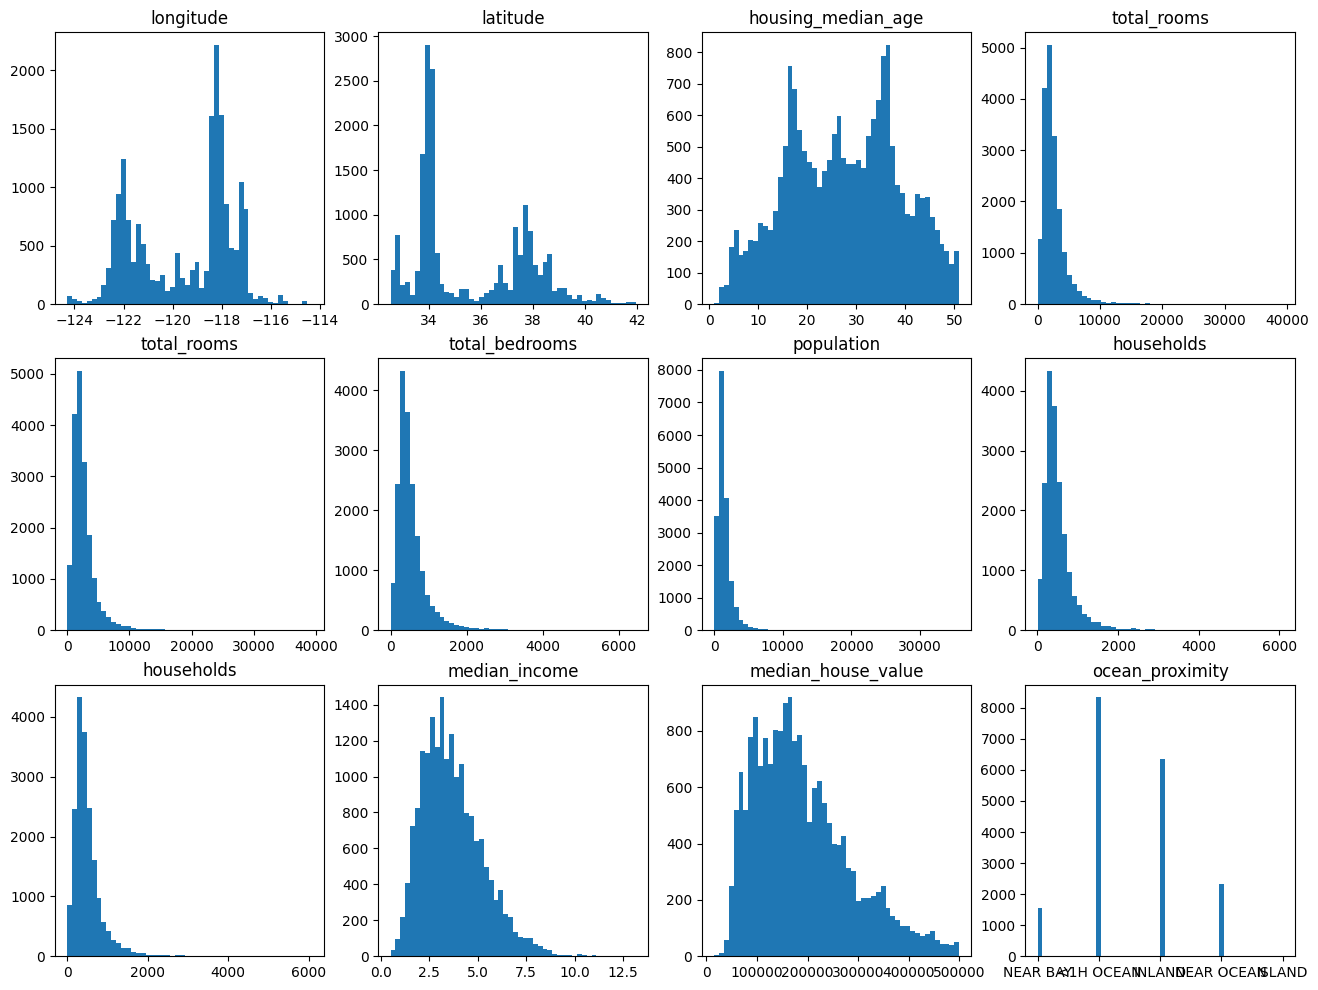

In [38]:
columns = housing_clean.columns.to_list()

N_col = 4
N = len(columns)
N_rows = int(np.ceil(N/N_col))

fig, ax = plt.subplots(N_rows,N_col, figsize=(4*N_col,4*N_rows))

for i in range(N_rows):
    for j in range(N_col):
        ax[i,j].hist(housing_clean[columns[i*N_rows+j]], bins=50)
        ax[i,j].set_title(columns[i*N_rows+j])

***
### Missing Features

If we look closely at the data, we see something annoying

In [69]:
#dataset without saturation
housing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18570 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18570 non-null  float64
 1   latitude            18570 non-null  float64
 2   housing_median_age  18570 non-null  float64
 3   total_rooms         18570 non-null  float64
 4   total_bedrooms      18377 non-null  float64
 5   population          18570 non-null  float64
 6   households          18570 non-null  float64
 7   median_income       18570 non-null  float64
 8   median_house_value  18570 non-null  float64
 9   ocean_proximity     18570 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Indeed, `total_bedrooms` is incomplete! When this happens, we have different solution paths:

1. Exclude incomplete features from the analysis (this reduces the number of columns)
2. Exclude observations or data with missing features from the analysis (this reduces the number of rows).
3. Fill in the missing values with synthetic data using some criteria.

The optimal choice depends, as always, on the data and the problem. We are going to use option 3 and fill `total_bedrooms` with the median.

We can do it by hand or take advantage of `sklearn` and use `SimpleImputer`

In [46]:
imputer = SimpleImputer(strategy='median')
df_imputer = imputer.fit_transform(housing_clean.drop(['ocean_proximity'], axis=1))
df_imputer[np.where(housing_clean['total_bedrooms'].isnull()>0), 4]

array([[442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 442., 442., 442., 442., 442., 442.,
        442., 442., 442., 442., 442., 

***

### Variables categoricas

Categorical variables present a challenge when training. The models need real numbers. To transform a categorical variable into a real number, two options are usually considered:

* Assign a number to each category. In the binary case, 0 and 1 are usually taken, to distinguish between "off" and "on". For the case of $\geq2$ categories, this makes sense if there is an "order" that follows the numbering.
* Map the categories to a space of lower dimensionality (what is known as "embedding").

An example of the latter is `One Hot Encoding`. If there are K possible categories for the variable, each measurement is mapped to a K-dimensional vector with 0s everywhere except the place corresponding to its category.

<1H OCEAN     8329
INLAND        6344
NEAR OCEAN    2328
NEAR BAY      1567
ISLAND           2
Name: ocean_proximity, dtype: int64

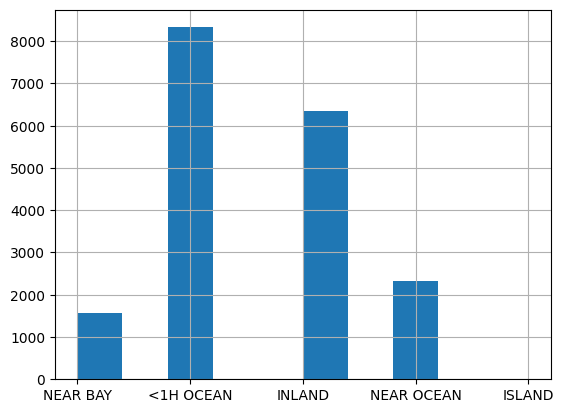

In [47]:
housing_clean['ocean_proximity'].hist()
housing_clean['ocean_proximity'].value_counts()

In [48]:
ohe=OneHotEncoder()
housing_cat_ohe=ohe.fit_transform(housing_clean[['ocean_proximity']])

In [49]:
housing_cat_ohe

<18570x5 sparse matrix of type '<class 'numpy.float64'>'
	with 18570 stored elements in Compressed Sparse Row format>

In [50]:
housing_cat_ohe.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [51]:
for value, transformed_value in zip(housing_clean['ocean_proximity'].unique(),ohe.transform(housing_clean['ocean_proximity'].unique().reshape(-1,1)).toarray()):
  print(value, transformed_value)

NEAR BAY [0. 0. 0. 1. 0.]
<1H OCEAN [1. 0. 0. 0. 0.]
INLAND [0. 1. 0. 0. 0.]
NEAR OCEAN [0. 0. 0. 0. 1.]
ISLAND [0. 0. 1. 0. 0.]


/home/mraponi/.local/bin/.virtualenvs/gis/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


***
### Standardization

When we have many continuous features, we can have unit problems. To avoid this and so that the algorithm does not assign spurious importance, it is convenient to standardize. Standardize is to set a strategy to pass the values to the interval [0,1], [-1,1] or whatever.
 
In particular, the `StandardScaler` transforms x into "number of standard deviations from the mean:

$x\rightarrow \frac{x-\mu}{\sigma}$

In [52]:
scaler = StandardScaler()

train_num_scaled = scaler.fit_transform(housing_clean.drop("ocean_proximity", axis=1))
test_num_scaled = scaler.transform(housing_clean.drop("ocean_proximity", axis=1))

In [53]:
for val1, val2 in zip(np.mean(housing_clean.drop("ocean_proximity", axis=1),axis=0),np.mean(train_num_scaled,axis=0)):
  print(val1, val2)

-119.48466289714594 1.9345740829311076e-15
35.593032848680664 1.5672498899695048e-15
26.985245018847603 4.2854489178853645e-17
2669.114970382337 -7.652587353366723e-19
548.0622517277031 nan
1470.549057619817 -4.591552412020034e-17
508.7754442649435 -2.4488279530773513e-17
3.692044404954227 5.815966388558709e-17
189587.64119547658 -1.8366209648080135e-17


In [54]:
for val1, val2 in zip(np.std(housing_clean.drop("ocean_proximity", axis=1),axis=0),np.std(train_num_scaled,axis=0)):
  print(val1, val2)

1.9807515849109945 1.0
2.147682118210494 1.0
11.430650529190014 1.0
2223.7328159428316 1.0
429.40670695179836 nan
1162.8783315509688 1.0
389.5428816306501 1.0
1.5656957516785013 1.0
95773.13954625867 1.0


We can also use the `MinMaxScaler`

In [55]:
scaler = MinMaxScaler()

train_num_scaled = scaler.fit_transform(housing_clean.drop("ocean_proximity", axis=1))
test_num_scaled = scaler.transform(housing_clean.drop("ocean_proximity", axis=1))

In [56]:
for val1, val2 in zip(np.max(housing_clean.drop("ocean_proximity", axis=1),axis=0),np.max(train_num_scaled,axis=0)):
  print(val1, val2)

-114.31 1.0
41.95 1.0
51.0 1.0
39320.0 0.9999999999999999
6445.0 nan
35682.0 1.0
6082.0 0.9999999999999999
13.1477 1.0
500000.0 1.0


In [57]:
for val1, val2 in zip(np.min(housing_clean.drop("ocean_proximity", axis=1),axis=0),np.min(train_num_scaled,axis=0)):
  print(val1, val2)

-124.3 0.0
32.54 0.0
1.0 0.0
2.0 0.0
2.0 nan
3.0 0.0
2.0 0.0
0.4999 0.0
14999.0 0.0


***

### Adding features

Data engineering also helps! In particular, we can add the following features

In [70]:
housing_clean["rooms_per_household"] = housing_clean["total_rooms"]/housing_clean["households"]
housing_clean["bedrooms_per_room"] = housing_clean["total_bedrooms"]/housing_clean["total_rooms"]
housing_clean["population_per_household"]=housing_clean["population"]/housing_clean["households"]

In [71]:
housing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18570 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 18570 non-null  float64
 1   latitude                  18570 non-null  float64
 2   housing_median_age        18570 non-null  float64
 3   total_rooms               18570 non-null  float64
 4   total_bedrooms            18377 non-null  float64
 5   population                18570 non-null  float64
 6   households                18570 non-null  float64
 7   median_income             18570 non-null  float64
 8   median_house_value        18570 non-null  float64
 9   ocean_proximity           18570 non-null  object 
 10  rooms_per_household       18570 non-null  float64
 11  bedrooms_per_room         18377 non-null  float64
 12  population_per_household  18570 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [72]:
set(housing_clean["ocean_proximity"].values) 

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

In [73]:
corr_matrix = housing_clean.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

/tmp/ipykernel_6738/3153409140.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing_clean.corr()


median_house_value          1.000000
median_income               0.661523
total_rooms                 0.152887
rooms_per_household         0.113042
households                  0.100518
total_bedrooms              0.080008
population                  0.021883
housing_median_age          0.014984
population_per_household   -0.020361
longitude                  -0.021911
latitude                   -0.172343
bedrooms_per_room          -0.228901
Name: median_house_value, dtype: float64

***

### Preprocess data with pipeline


We are going to separate the target and scale the numeric variables and re-express the categorical ones. 

We combine everything in a pipeline.

In [74]:
housing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18570 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 18570 non-null  float64
 1   latitude                  18570 non-null  float64
 2   housing_median_age        18570 non-null  float64
 3   total_rooms               18570 non-null  float64
 4   total_bedrooms            18377 non-null  float64
 5   population                18570 non-null  float64
 6   households                18570 non-null  float64
 7   median_income             18570 non-null  float64
 8   median_house_value        18570 non-null  float64
 9   ocean_proximity           18570 non-null  object 
 10  rooms_per_household       18570 non-null  float64
 11  bedrooms_per_room         18377 non-null  float64
 12  population_per_household  18570 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [76]:
housing_labels = housing_clean["median_house_value"].copy()
housing_clean = housing_clean.drop("median_house_value", axis=1) # drop labels for training set
housing_cat = housing_clean[["ocean_proximity"]]
housing_num = housing_clean.drop("ocean_proximity", axis=1)

In [77]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), 
                         ('std_scaler', StandardScaler())])

num_attribs = list(housing_num)  #list with the names of the numeric columns
cat_attribs = ["ocean_proximity"] #list of a string element


full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs)])

The `num_pipeline` has two steps. First, the `SimpleImputer` takes care of filling in the missing data. Use the median of the missing feature. Second, the `StandardScaler()` takes care of standardizing the data

In [78]:
housing_num_transformed=num_pipeline.fit_transform(housing_num)

In [79]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18570 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 18570 non-null  float64
 1   latitude                  18570 non-null  float64
 2   housing_median_age        18570 non-null  float64
 3   total_rooms               18570 non-null  float64
 4   total_bedrooms            18377 non-null  float64
 5   population                18570 non-null  float64
 6   households                18570 non-null  float64
 7   median_income             18570 non-null  float64
 8   rooms_per_household       18570 non-null  float64
 9   bedrooms_per_room         18377 non-null  float64
 10  population_per_household  18570 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


In [80]:
housing_num_transformed[np.where(housing_num['total_bedrooms'].isnull()>0),4]

array([[-0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.24563245, -0.24563245,
        -0.24563245, -0.24563245, -0.24563245, -0.2

And the StandardScaler

In [81]:
num_pipeline.named_steps['std_scaler'].mean_

array([-1.19484663e+02,  3.55930328e+01,  2.69852450e+01,  2.66911497e+03,
        5.46959935e+02,  1.47054906e+03,  5.08775444e+02,  3.69204440e+00,
        5.38566697e+00,  2.13918378e-01,  3.10855268e+00])

In [82]:
housing_prepared = full_pipeline.fit_transform(housing_clean)

In [83]:
housing_prepared.shape 

(18570, 16)

In [84]:
housing_clean.shape 

(18570, 12)

***

### Definition of the problem and target

We can define a particular problem: `predicting the median price of a district` based on its characteristics. 
It is a `supervised univariate regression problem` where my target is "__median_house_value__" and my features are all the other categories.

Since it's a regression problem, We are going to use one of the more common metrics. The `root mean squared error`. 

If my target is $\vec{t}=(t_1,t_2,...,t_N)^{T}$ and my predictions are $\vec{y}=(y_1,y_2,...,y_N)^ {T}$, then

$\text{RMSE}(\vec{t},\vec{y})=\sqrt{\frac{1}{N}\sum_{n=1}^{N}(t_n-y_n)^{2 }}$

The idea of RMSE is to give an expected error to the prediction.

In [89]:
def rmse(y,t):
  return np.sqrt(mean_squared_error(y,t))

0.05


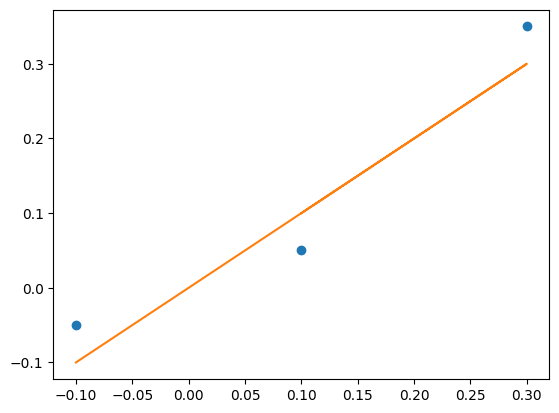

In [91]:
#this is a test: 
t_test=[0.1,0.3,-0.1]
y_test=[0.05,0.35,-0.05]

print(rmse(t_test,y_test))
plt.plot(t_test, y_test,'o')
plt.plot(t_test, t_test)

***
***

### 4) Applying Machine Learning Tools

#### 4.1) Linear Regression


In [92]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(housing_prepared,housing_labels)
y_pred_train = modelo.predict(housing_prepared)

print(rmse(housing_labels,y_pred_train))

58010.15022036034


Text(0, 0.5, 'y_pred_train')

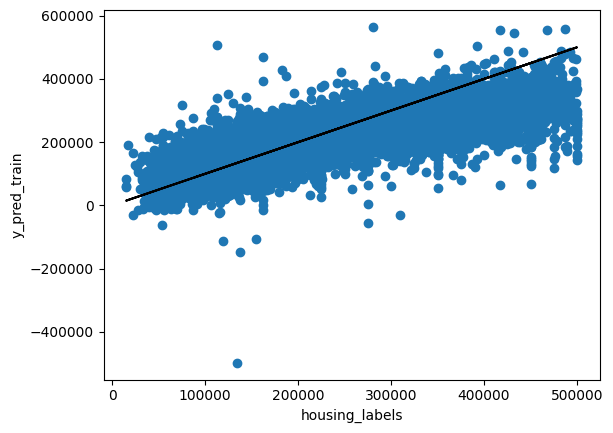

In [93]:
plt.scatter(housing_labels,y_pred_train)
plt.plot(housing_labels,housing_labels,'k')
plt.xlabel('housing_labels')
plt.ylabel('y_pred_train')

# was more wrong with high prices than with medium prices

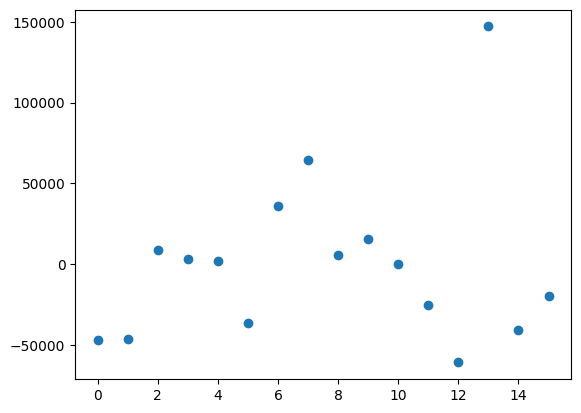

In [94]:
plt.plot(np.arange(0.0,len(modelo.coef_),1.0),modelo.coef_,'o')

In [95]:
housing_prepared.shape

(18570, 16)

In [96]:
modelo.intercept_

227721.04137239364

In [97]:
modelo.coef_.shape

(16,)

#### 4.2) Neural Network

In [117]:
#install and import TF and Keras
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)
keras.backend.clear_session()


In [118]:
#spliting the dataset (training and testing set, 75% - 25%)
X_train, X_test, y_train, y_test = train_test_split(housing_num_transformed, housing_labels, random_state=42)
X_train_proc=num_pipeline.fit_transform(X_train)
X_test_proc=num_pipeline.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(13927, 11)
(4643, 11)


In [119]:
scaler_labels = StandardScaler()
y_train_proc = scaler_labels.fit_transform(np.asarray(y_train).reshape(-1,1))
y_test_proc = scaler_labels.transform(np.asarray(y_test).reshape(-1,1))


We define hyperparameters of the neural network

In [120]:
input_shape = X_train_proc.shape[1:]
batch_size = 128
epochs = 50
print(f'input_shape: {input_shape}')

input_shape: (11,)


We create a simple sequential model of 3 dense layers.

* layer 1: 30 neurons
* layer 2: 30 neurons
* layer 3 (output): 1 neuron


In [121]:
modelo = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

We compile the model. Set the loss function as mean_squared_error and the optimizer as SGD

In [122]:
modelo.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [123]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                360       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


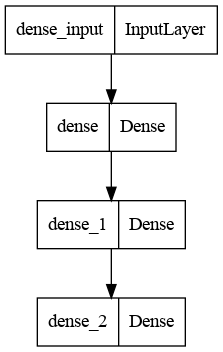

In [124]:
#install the following packages: pydot  and graphviz
tf.keras.utils.plot_model(modelo)

In [125]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

history = modelo.fit(X_train_proc, y_train_proc[:,0], epochs=epochs,
                    validation_data=(X_test_proc, y_test_proc[:,0]),
                    callbacks=[early_stopping_cb])

Epoch 1/50
436/436 [==============================] - 1s 2ms/step - loss: 0.7325 - val_loss: 0.5886
Epoch 2/50
436/436 [==============================] - 1s 2ms/step - loss: 0.5087 - val_loss: 0.4869
Epoch 3/50
436/436 [==============================] - 1s 2ms/step - loss: 0.4483 - val_loss: 0.4549
Epoch 4/50
436/436 [==============================] - 1s 2ms/step - loss: 0.4242 - val_loss: 0.4371
Epoch 5/50
436/436 [==============================] - 1s 2ms/step - loss: 0.4106 - val_loss: 0.4262
Epoch 6/50
436/436 [==============================] - 1s 2ms/step - loss: 0.3999 - val_loss: 0.4165
Epoch 7/50
436/436 [==============================] - 1s 2ms/step - loss: 0.3915 - val_loss: 0.4113
Epoch 8/50
436/436 [==============================] - 1s 2ms/step - loss: 0.3856 - val_loss: 0.4033
Epoch 9/50
436/436 [==============================] - 1s 2ms/step - loss: 0.3797 - val_loss: 0.3966
Epoch 10/50
436/436 [==============================] - 1s 2ms/step - loss: 0.3746 - val_loss: 0.3910

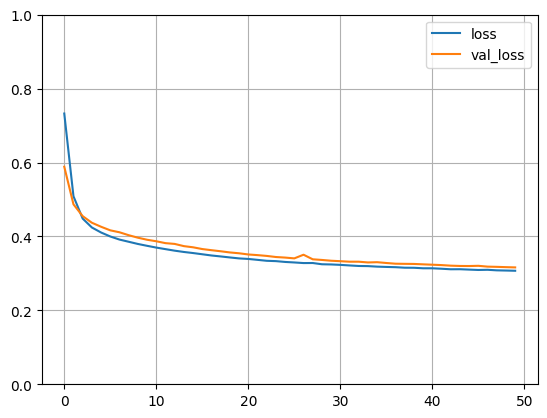

In [126]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [127]:
mse_train = modelo.evaluate(X_train_proc, y_train_proc)

436/436 [==============================] - 1s 1ms/step - loss: 0.3058


436/436 [==============================] - 0s 901us/step


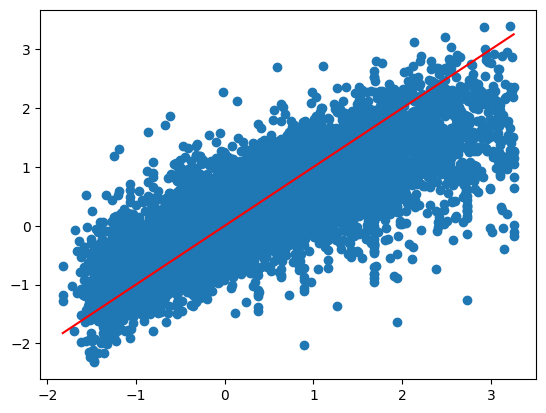

In [128]:
x=np.linspace(min(y_train_proc[:,0]),max(y_train_proc[:,0]),3)
plt.scatter(y_train_proc[:,0],modelo.predict(X_train_proc))
plt.plot(x,x,color='red')

In [129]:
rmse(scaler_labels.inverse_transform(modelo.predict(housing_num_transformed)),housing_labels)

581/581 [==============================] - 1s 829us/step


53006.0644592182